<a href="https://colab.research.google.com/github/TarsilaSamille/calculo-numerico/blob/main/lista1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lista 1** 💻

1.
https://www.jdoodle.com/online-java-compiler/

```
public class RaizBabilonica {
    public static double raizBabilonica(double n, double err) {
        double x = n,  y = 1;
        while (Math.abs(x - y) > err) {
            x = (x + y) / 2;
            y = n / x;
        }
        return x;
    }

    public static void main(String[] args) {
        System.out.println(raizBabilonica(10, 1e-6));
    }
}
```



2.

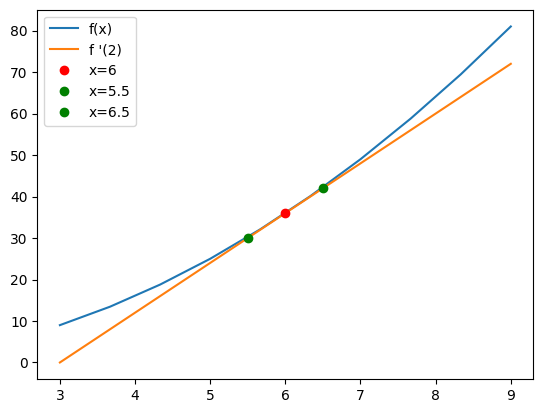

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def f_trasso(x):
    h = 0.0001
    return (f(x+h) - f(x)) / h

a = 6
x = np.linspace(3, 9,10)
y = f(x)

tangent_line = f(a) + f_trasso(a) * (x - a)
x_left = a - 0.5
x_right = a + 0.5
y_left = f(a) + f_trasso(a) * (x_left - a)
y_right = f(a) + f_trasso(a) * (x_right - a)


plt.plot(x, y, label='f(x)')
plt.plot(x, tangent_line, label='f \'(2)')
plt.plot(a, f(a), 'ro', label='x='+str(a))
plt.plot(x_left, y_left, 'go', label='x='+str(x_left))
plt.plot(x_right, y_right, 'go', label='x='+str(x_right))

plt.legend()
plt.show()

3.

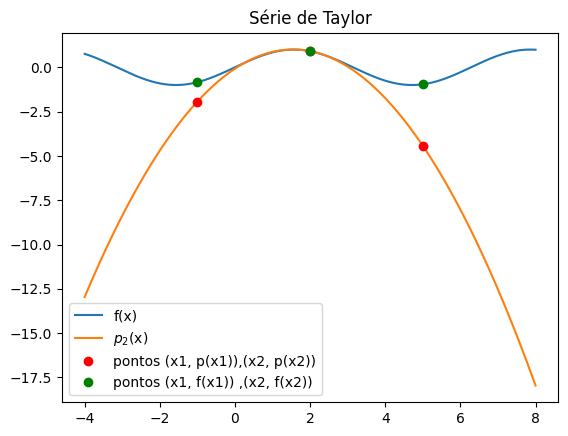

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def f_linha(x):
    return np.cos(x)

def f_2_linha(x):
    return -np.sin(x)

def taylor(a, x):
    return f(a) + f_linha(a)*(x-a) + f_2_linha(a)*((x-a)**2)/2

a = 2
x = np.linspace(-4, 8, 1000)
x_left = a - 3
x_right = a + 3

taylor_poly = taylor(a, x)
p_left = taylor(a, x_left)
p_right = taylor(a, x_right)

fig, ax = plt.subplots()

ax.plot(x, f(x), label='f(x)')
ax.plot(x, taylor_poly, label='$p_{2}$(x)')
ax.plot([x_left, a, x_right], [p_left, f(a), p_right], 'ro', label='pontos (x1, p(x1)),(x2, p(x2))')
ax.plot([x_left, a, x_right], [f(x_left), f(a), f(x_right)], 'go', label='pontos (x1, f(x1)) ,(x2, f(x2))')
ax.legend()
ax.set_title('Série de Taylor')
plt.show()

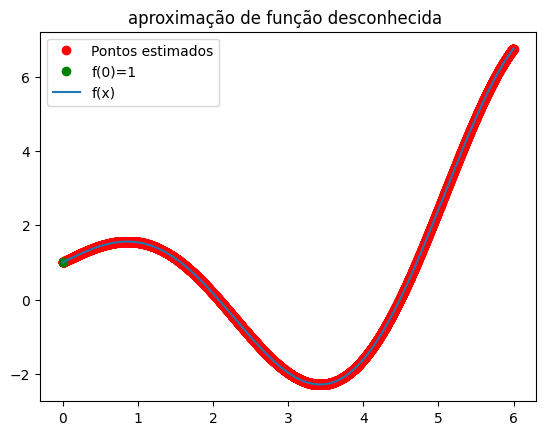

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# função desconhecida 
def f(x):
    return x * np.cos(x) + 1

# derivada
def f_linha(x):
    return np.cos(x) - x * np.sin(x)

# define o ponto conhecido e o intervalo [a,b]
f_0 = 1
a = 0
b = 6

# define h
h = 0.001

# calcula os pontos estimados usando o método de Euler
x = [0]
f_estimado = [f_0]
while x[-1] < b:
    x_novo = x[-1] + h
    f_novo = f_estimado[-1] + f_linha(x[-1]) * h
    x.append(x_novo)
    f_estimado.append(f_novo)

# plota os pontos estimados e o f(0)
plt.plot(x, f_estimado, 'ro', label='Pontos estimados')
plt.plot(0, f_0, 'go', label='f(0)=1')

# plota a função desconhecida 
x_plot = np.linspace(a, b, 1000)
f_plot = f(x_plot)
plt.plot(x_plot, f_plot, label='f(x)')

plt.legend()
plt.title('aproximação de função desconhecida ')

plt.show()


# **Lista 2** 💻

### 1 e 3


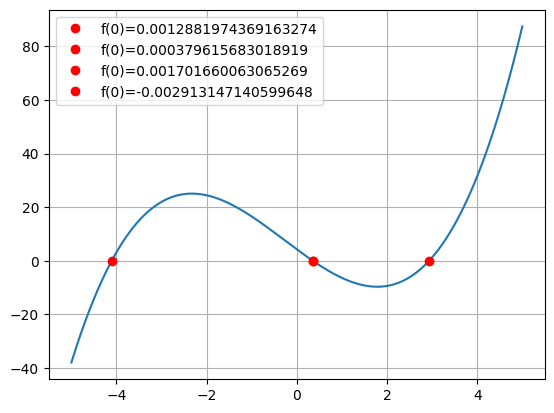

Bissecao:
-4.104962158203125
Newton:
0.34996616822018756
Secante:
2.935097601756937
Regula Falsi:
0.35025210277747754


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

tol=0.01
max_iter=1000

#funcao f(x) da qual vamos extrair as raizes
def f(x):
  return x**3 + 0.82 * x**2 -12.4577 * x + 4.21686

#a derivada da funcao f(x)
def f1(x):
	return 3*x**2+1.64*x-12.4577

#metodo da bissecao
def bissecao(a, b):
    i = 0
    while i < max_iter:
        c = (a + b) / 2
        if abs(f(c)) < tol:
            return c
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        i += 1
    return None

#metodo de Newton
def newton(x):
    i = 0
    while i < max_iter:
        fx = f(x)
        f1x = f1(x)
        if abs(fx) < tol:
            return x
        x = x - (fx / f1x)
        i += 1
    return None

#metodo da secante
def secante(x0, x1):
    i = 0
    while i < max_iter:
        fx0 = f(x0)
        fx1 = f(x1)
        if abs(fx1) < tol:
            return x1
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        x0 = x1
        x1 = x2
        i += 1
    return None

#metodo regula falsi
def regulaFalsi(a, b):
    i = 0
    fa = f(a)
    fb = f(b)
    while i < max_iter:
        c = b - fb * (b - a) / (fb - fa)
        fc = f(c)
        if abs(fc) < tol:
            return c
        if fc * fb < 0:
            a = b
            fa = fb
        else:
            fa /= 2
        b = c
        fb = fc
        i += 1
    return None



x = np.linspace(-5, 5, 1000)
y = f(x)

plt.plot(x, y)
plt.grid(True)

z = bissecao(-4.3, 4.0)
plt.plot(z, f(z), 'ro', label='f(0)='+str(f(z)))

z = newton(1.2)
plt.plot(z, f(z), 'ro', label='f(0)='+str(f(z)))

z = secante(2.8, 3.4)
plt.plot(z, f(z), 'ro', label='f(0)='+str(f(z)))

z = regulaFalsi(0, 1)
plt.plot(z, f(z), 'ro', label='f(0)='+str(f(z)))


plt.legend()

plt.show()

f1(0)


#coloque em ... os valores iniciais
print("Bissecao:")
print(bissecao(-4.3, 4.0))
print("Newton:")
print(newton( 1.2))
print("Secante:")
print(secante( 2.8, 3.4))
print("Regula Falsi:")
print(regulaFalsi(0, 1))





### 2. 


a. Uma desvantagem de usar |f(xk)| < ϵ como critério de parada é que a função pode apenas chegar próximo de 0, mas não cruzar o eixo x.


> Verdadeiro. O critério de parada |f(xk)| < ϵ não garante que a função cruze o eixo x e alcance uma raiz exata

b. Dado um intervalo [a, b], se f é contínua, f(a) > 0 e f(b) > 0, então não há raiz real no intervalo [a,b].

> Falso. A condição f(a) > 0 e f(b) > 0 apenas garante que não há raiz no intervalo se f for contínua e não mudar de sinal no intervalo.


c. Dado um intervalo [a, b], se f é contínua, f(a) > 0 e f(b) < 0, então há exatamente uma única raiz real no intervalo [a, b].

 > Falso. O Teorema do Valor Intermediário garante a existência de pelo menos uma raiz no intervalo em questão, mas não garante que seja única. Pode haver várias raízes se a função mudar de sinal várias vezes no intervalo.

d. O método de Newton terá uma melhor convergência se já estiver próximo da raiz.
> É verdadeiro porque o método de Newton é baseado na aproximação linear da função, que é mais precisa quanto mais próxima da raiz inicial estiver.

e. Uma desvantagem do método da secante é ter que calcular analiticamente a derivada da função.

> É falso porque o método da secante usa uma aproximação numérica da derivada, sem precisar calcular explicitamente.

f. O método Regula Falsi (falsa posição) sempre mantém um intervalo cujos extremos possuem sinais opostos na função.

> Verdadeiro
g. Um ponto fixo p em uma função g(x) é tal que g(p) = 0.
> É falso porque um ponto fixo p em uma função g(x) é tal que g(p) = p, e não g(p) = 0.

h. Se f(x) = x - g(x), então os pontos fixos de g(x) são raízes de f(x)

 > É verdadeiro porque se f(x) = x - g(x), então as raízes de f(x) são os pontos em que x = g(x), ou seja, os pontos fixos de g(x).

### 4.

<ipython-input-22-74ced209ad37>:9: RuntimeWarning: divide by zero encountered in true_divide
  return (h*((1/(x1**2-L**2)**0.5)+(1/(x2**2-L**2)**0.5)))- 1


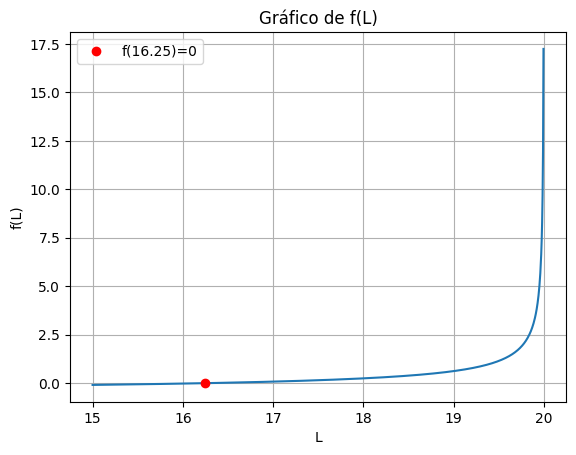

1.2121212121212122


In [ ]:
import math
import matplotlib.pyplot as plt

h=8
x1=20
x2=30

def f(L):
    return (h*((1/(x1**2-L**2)**0.5)+(1/(x2**2-L**2)**0.5)))- 1


x = np.linspace(15, 20, 1000)
y = f(x)

plt.plot(x, y)
plt.grid(True)

z = bissecao(10, 20)
plt.plot(z, f(z), 'ro', label='f('+str(z)+')=0')
plt.legend()


plt.xlabel('L')
plt.ylabel('f(L)')
plt.title('Gráfico de f(L)')
plt.show()

l=16.5
x=l*h/(x2**2-l**2)**0.5 # 5.2
print(x1/l)



# **Lista 3** 💻




### 1.

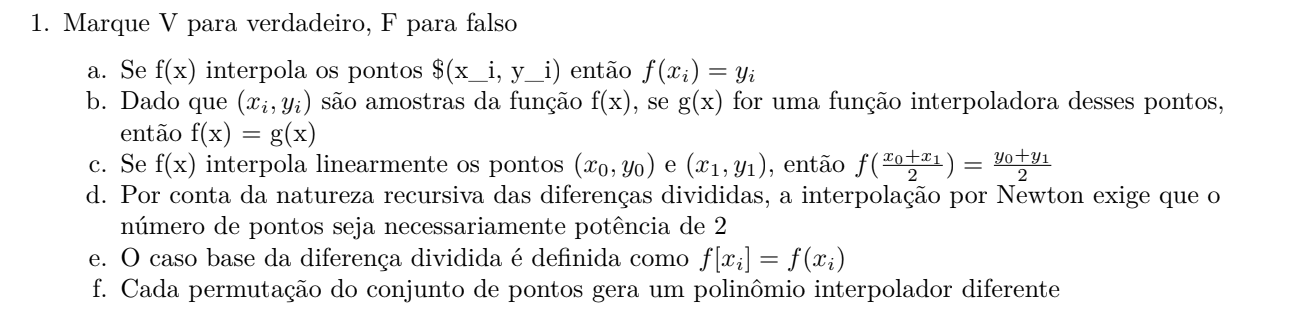

a. V, pois a definição de interpolação é que a função interpoladora deve coincidir com os valores conhecidos nos pontos de interpolação.

b. F, A função interpoladora g(x) pode ser uma aproximação polinomial de grau inferior à função f(x) original, por exemplo.

c. V, isso é verdadeiro para a interpolação linear, que é um caso particular da interpolação polinomial. 

d. F, a interpolação por Newton não exige que o número de pontos seja uma potência de 2.

e. V, A diferença dividida é definida recursivamente em termos de diferenças divididas de ordem inferior

f. V, Cada conjunto de pontos gera um polinômio interpolador diferente e a ordem dos pontos também afeta o resultado.

### 2. 


b. $\ell_i(x_i) = 1$ e $\ell_i(x_j) = 0$ para todo $j \neq i$. A função $\ell_i(x)$ é igual a 1 no ponto $x_i$ e igual a 0 em todos os outros pontos $x_j$ diferentes de $x_i$. Isso significa que $\ell_i(x)$ "seleciona" o valor $y_i$ da função interpolada $f(x)$ no ponto $x_i$, enquanto "anula" os valores nos outros pontos.

2. A interpolação de Lagrange para n + 1 pontos é dada por:
$
P_n(x) = \sum_{i=0}^{n} l_i(x)f(x_i)
$

a. Expresse matematicamente $l_i(x)$
$
l_i(x) = \prod_{j=0, j\neq i}^{n} \frac{x-x_j}{x_i-x_j}
$

b. Qual o valor de $l_i(x_i)$ e qual o valor de $l_i(x_j)$ para $j \neq i$? 

$l_i(x_i)=1$ e $l_i(x_j)=0$ para $j\neq i$. Isso ocorre pois no produto acima, quando $j=i$, o termo da fração é $(x_i-x_i)=0$ e todas as outras frações terão um termo que é diferente de zero no denominador. Quando $j\neq i$, o termo da fração será $(x_i-x_j)$, que é diferente de zero, e todas as outras frações terão um termo $(x_i-x_k)$ no denominador com $k \neq i$ e $k \neq j$, que é diferente de zero.


### 3

Para cada conjunto de pontos da tabela a seguir:
a. calcule o polinômio interpolador;
b. calcule f(a);
c. plote o gráfico com os pontos, o polinômio interpolador e o ponto (a, f(a)).

Conjunto de pontos Metodo a (calcule f(a))[]

{(1, 4), (3, 2)} Sistemas lineares 2

{(1, 4), (3, 2)} Newton 2

{(1, 4), (3, 2)} Lagrange 2

{(-1, 15), (0, 8)} Qualquer -0.6

{(1, 3), (2, -1), (3, 4)} Lagrange 2.5

{(1, 3), (2, -1), (3, 4)} Newton 2.5

{(1, 3), (2, -1), (3, 4), (4, 2)} Newton 2.5

### Conjunto de pontos: {(1, 4), (3, 2)}

a. Polinômio interpolador usando sistemas lineares:
Para calcular o polinômio interpolador usando sistemas lineares, podemos utilizar o seguinte sistema de equações:
\begin{align*}
a_0 + a_1 x_0 &= f(x_0)\
a_0 + a_1 x_1 &= f(x_1)
\end{align*}

Substituindo os valores, temos:
\begin{align*}
a_0 + a_1 \cdot 1 &= 4\
a_0 + a_1 \cdot 3 &= 2
\end{align*}

Resolvendo esse sistema, obtemos $a_0 = 5$ e $a_1 = -1$.
Portanto, o polinômio interpolador é $P(x) = 5 - x$.

b. Valor de f(a):
Considerando $a=2$, temos $f(a) = f(2) = -1$.

c. plote o gráfico com os pontos, o polinômio interpolador e o ponto (a, f(a)).

[-1.  5.]


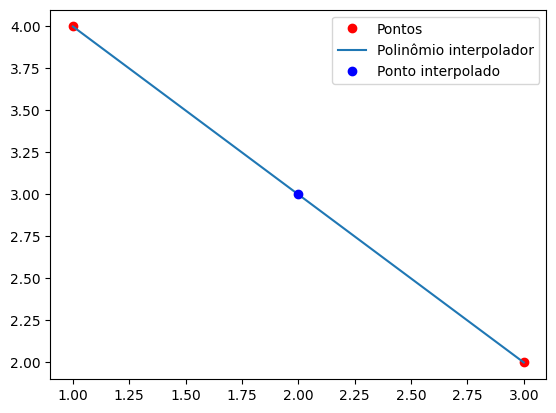

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Conjunto de pontos
pontos = np.array([[1,4], [3,2]])

# Método de interpolação
x = pontos[:,0]
y = pontos[:,1]
coef = np.polyfit(x, y, 1)
print(coef)
polinomio = np.poly1d(coef)

# Ponto a ser interpolado
a = 2
fa = polinomio(a)

# Plot do gráfico
plt.plot(x, y, 'ro', label='Pontos')
plt.plot(x, polinomio(x), label='Polinômio interpolador')
plt.plot(a, fa, 'bo', label='Ponto interpolado')
plt.legend(loc='best')
plt.show()


### Conjunto de pontos: {(1, 4), (3, 2)}

a. Polinômio interpolador usando Newton:

Usando a tabela de diferenças divididas de Newton, podemos encontrar o polinômio interpolador:
\begin{align*}
f[x_0] &= f(1) = 4
\end{align*}
\begin{align*}
f[x_1] &= f(3) = 2
\end{align*}
\begin{align*}
f[x_0, x_1] &= \frac{f[x_1] - f[x_0]}{x_1 - x_0} = -1
\end{align*}
\begin{align*}
P(x) &= f[x_0] + f[x_0, x_1](x - x_0)\
&= 4 - (x - 1)
\end{align*}

Portanto, o polinômio interpolador é $P(x) = 4 - (x - 1)$.

b. Valor de f(a):
Considerando $a=2$, temos $f(a) = f(2) = 3$.

c. plote o gráfico com os pontos, o polinômio interpolador e o ponto (a, f(a)).


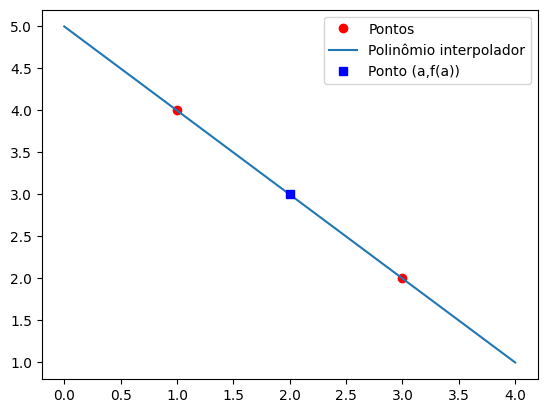

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dados do problema
x = np.array([1, 3])
y = np.array([4, 2])
a = 2

# Polinômio interpolador de Newton
p = np.polyfit(x, y, deg=1)

# Pontos para plotar o gráfico
xi = np.linspace(min(x)-1, max(x)+1, 100)
yi = np.polyval(p, xi)
ya = np.polyval(p, a)

# Plotando o gráfico
plt.plot(x, y, 'ro', label='Pontos')
plt.plot(xi, yi, label='Polinômio interpolador')
plt.plot(a, ya, 'bs', label='Ponto (a,f(a))')
plt.legend()
plt.show()


### Conjunto de pontos {(1, 4), (3, 2)} usando o método de interpolação de Lagrange, temos:

a. O polinômio interpolador é dado por:

\begin{align*}
P(x) &= l_0(x) f(x_0) + l_1(x) f(x_1) 
\end{align*}
\begin{align*}
&= \frac{x-3}{1-3} \cdot 4 + \frac{x-1}{3-1} \cdot 2 
\end{align*}
\begin{align*}
&= -x + 5
\end{align*}

b. Para encontrar o valor de $f(a)$, basta substituir $a$ no polinômio interpolador:

\begin{align*}
f(a) &= -a + 5 
\end{align*}
\begin{align*}
f(2) &= -2 + 5 = 3
\end{align*}

c. plote o gráfico com os pontos, o polinômio interpolador e o ponto (a, f(a)).

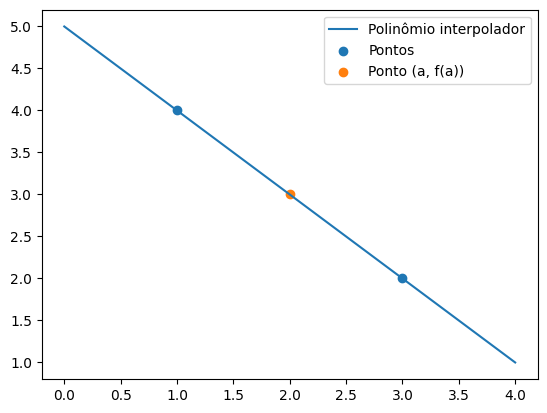

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dados do problema
points = [(1, 4), (3, 2)]
a = 2
fa = 3

# Função de Lagrange
def lagrange(x):
    return ((x-3)/(1-3))*4 + ((x-1)/(3-1))*2

# Valores para plotagem do gráfico
x = np.linspace(0, 4, 100)
y = lagrange(x)

# Plotando o gráfico
fig, ax = plt.subplots()
ax.plot(x, y, label="Polinômio interpolador")
ax.scatter([p[0] for p in points], [p[1] for p in points], label="Pontos")
ax.scatter(a, fa, label="Ponto (a, f(a))")
ax.legend()
plt.show()


Para o conjunto de pontos ${(-1, 15), (0, 8)}$, o polinômio interpolador por Newton é dado por:

\begin{align*}
p(x) &= f(x_0) + (x-x_0)\frac{f(x_1) - f(x_0)}{x_1-x_0} 
\end{align*}
\begin{align*}
&= 15 + (x+1)\frac{8-15}{0+1} 
\end{align*}
\begin{align*}
&= -7x + 22
\end{align*}

Para $a = -0.6$, temos:

\begin{align*}
f(-0.6) &= -7(-0.6) + 22 = 26.2
\end{align*}

c. plote o gráfico com os pontos, o polinômio interpolador e o ponto (a, f(a)).

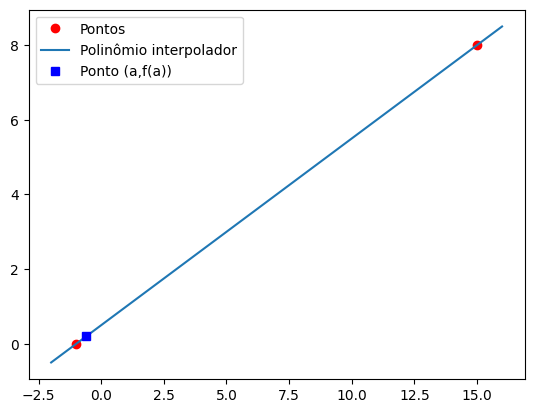

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dados do problema
x = np.array([-1, 15])
y = np.array([0, 8])
a = -0.6

# Polinômio interpolador de Newton
p = np.polyfit(x, y, deg=1)

# Pontos para plotar o gráfico
xi = np.linspace(min(x)-1, max(x)+1, 100)
yi = np.polyval(p, xi)
ya = np.polyval(p, a)

# Plotando o gráfico
plt.plot(x, y, 'ro', label='Pontos')
plt.plot(xi, yi, label='Polinômio interpolador')
plt.plot(a, ya, 'bs', label='Ponto (a,f(a))')
plt.legend()
plt.show()

{(1, 3), (2, -1), (3, 4)} Lagrange 2.5



a) O polinômio interpolador usando o método de Lagrange para esses pontos é:
\begin{align*}
P(x) &= l_0(x)f(x_0) + l_1(x)f(x_1) + l_2(x)f(x_2)
\end{align*}
\begin{align*}
&= \left(\frac{(x-2)(x-3)}{(1-2)(1-3)}\right) \cdot 3 + \left(\frac{(x-1)(x-3)}{(2-1)(2-3)}\right) \cdot (-1) + \left(\frac{(x-1)(x-2)}{(3-1)(3-2)}\right) \cdot 4
\end{align*}
\begin{align*}
&= -3x^2 + 17x - 10
\end{align*}

b) Para calcular $f(2.5)$, basta substituir $x = 2.5$ em $P(x)$:
\begin{align*}
P(2.5) &= -3(2.5)^2 + 17(2.5) - 10 = \frac{1}{2}
\end{align*}

c. plote o gráfico com os pontos, o polinômio interpolador e o ponto (a, f(a)).

[[ 1  3]
 [ 2 -1]
 [ 3  4]]
1466.0
4.0
0.375


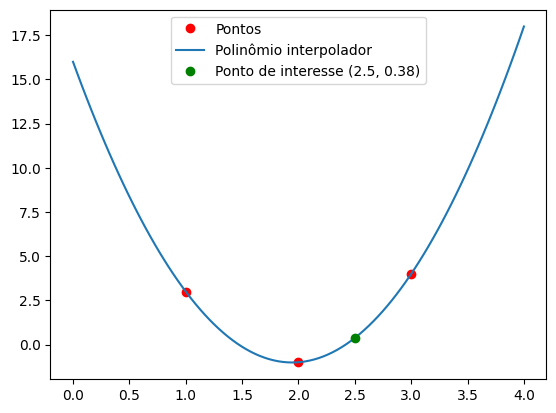

In [ ]:

def ld(head, tail):
    value = 1
    for z in tail:
      value = value * (head-z)
    return value
  
def lt(x, A):
    value = 1
    for z in A:
      value = value * (x-z)
    return value

def lg(x, A):
    head, *tail = A
    return lt(x, tail)/ld(head, tail)
    
def l(xMain, z,  A):
    xA = []
    for i in np.arange(len(A)) :
      xA.insert(i, x((z + i) % len(A)))
    return lg(xMain, xA)

def x(z):
    return A[z,0]

def y(z):
    return A[z,1]

def lagrange(A, x):
  value = 0
  idx = np.arange(len(A)) 
  for i in idx:
    value = value + (y(i)*l(x, i, A))
  return value

    
A = np.array([[1, 3], [2, -1], [3, 4]])

print(A)

print(lagrange(A, x1))
print(lagrange(A, 3))
print(lagrange(A, 2.5))

# define o ponto de interesse
x_point = 2.5

# calcula o valor do polinômio de Lagrange no ponto de interesse
y_point = lagrange(A, x_point)

# gera o gráfico com os pontos, o polinômio interpolador e o ponto de interesse
x_array = A[:, 0]
y_array = A[:, 1]
x_ = np.linspace(x_array.min()-1, x_array.max()+1, 100)
y_ = lagrange(A, x_)

plt.plot(x_array, y_array, 'ro', label='Pontos')
plt.plot(x_, y_, label='Polinômio interpolador')
plt.plot(x_point, y_point, 'go', label=f'Ponto de interesse ({x_point}, {y_point:.2f})')
plt.legend()
plt.show()



{(1, 3), (2, -1), (3, 4)} Newton 2.5

a. Para encontrar o polinômio interpolador usando o método de Newton, começamos com a tabela das diferenças divididas:

| x_i | f[x_i] | f[x_i, x_{i+1}] | f[x_i, x_{i+1}, x_{i+2}] |
| --- | --- | --- | --- |
| 1 | 3 | -4 | 3/2 |
| 2 | -1 | 7/2 |  |
| 3 | 4 |  |  |


Então, usamos a fórmula de Newton para escrever o polinômio interpolador:

\begin{align*}
P(x) &= f[x_0] + f[x_0, x_1](x - x_0) + f[x_0, x_1, x_2](x - x_0)(x - x_1) 
\end{align*}
\begin{align*}
&= 3 - 4(x - 1) + \frac{3}{2}(x - 1)(x - 2) 
\end{align*}
\begin{align*}
&= -\frac{3}{2}x^2 + \frac{13}{2}x - 5
\end{align*}

Portanto, o polinômio interpolador usando o método de Newton é $P(x) = -\frac{3}{2}x^2 + \frac{13}{2}x - 5$.

b. Para encontrar $f(a)$ usando o método de Newton, precisamos substituir $x = a$ na fórmula de Newton:

\begin{align*}
N(a) &= f(x_0) + f[x_0, x_1](a - x_0) + f[x_0, x_1, x_2](a - x_0)(a - x_1) 
\end{align*}
\begin{align*}
&= 3 - 4(a - 1) + \frac{3}{2}(a - 1)(a - 2) 
\end{align*}
\begin{align*}
&= -\frac{3}{2}a^2 + \frac{13}{2}a - 5
\end{align*}

Substituindo $a = 2.5$:

\begin{align*}
f(2.5) &= N(2.5) 
\end{align*}
\begin{align*}
&= -\frac{3}{2}(2.5)^2 + \frac{13}{2}(2.5) - 5 = 1.75
\end{align*}


Portanto, $f(2.5) = 1.75$.



{(1, 3), (2, -1), (3, 4), (4, 2)} Newton 2.5


f[1] = 3
f[2] = -1
f[3] = 4
f[4] = 2

f[2,1] = (f[2]-f[1])/(2-1) = -4
f[3,2] = (f[3]-f[2])/(3-2) = 5
f[4,3] = (f[4]-f[3])/(4-3) = -2

f[3,2,1] = (f[3,2]-f[2,1])/(3-1) = 9/2
f[4,3,2] = (f[4,3]-f[3,2])/(4-2) = -7/2

f[4,3,2,1] = (f[4,3,2]-f[3,2,1])/(4-1) = -16/3

p(2.5) = f[1] + f[2,1] + f[3,2,1](2.5-2) + f4,[3,2,1](2.5-2)(2.5-3)

= 3 - 4(1.5) + (9/2)(1.5)(0.5) - (16/3)(1.5)(0.5)(-0.5)


= 3 - 6.0 + 2.8125 - 0.666667
= -0.854167

p(2.5) = -0.854167.


c. plote o gráfico com os pontos, o polinômio interpolador e o ponto (a, f(a)).

2.0078125


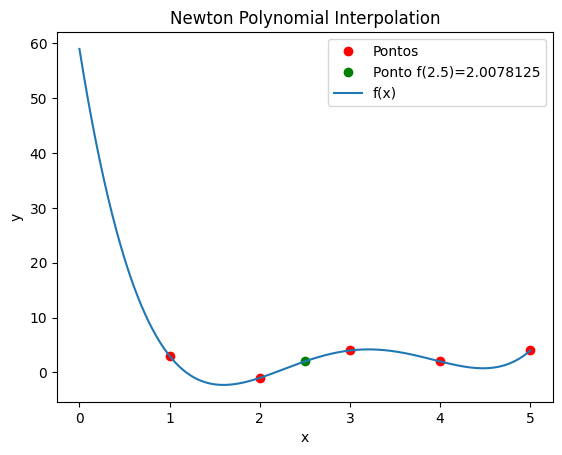

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def name_f(size_array, n):
  name = 'f'
  for w in size_array:
    name = name + str(w + n) 
  return name

def newton_interpolation_f(x, y):
  f = {}
  lenY = len(y)
  for z in np.arange(lenY):
    for n in np.arange(lenY - z):
      if z == 0: 
        f['f'+ str(n)] = y[n]
      else:
        size = np.arange(z + 1)
        f[name_f(size, n)] = (f[name_f(size[1:], n)] - f[name_f(size[:-1], n)]) / (x[n+z] - x[n]) 
  return f;

def int_mult(n,size_array, x):
  value = 1
  for z in size_array:
    value = value * (n-x[z])
  return value

  
def newton_interpolation(n,x, y):
  f = newton_interpolation_f(x, y)
  value = 0
  for z in np.arange(len(y)):
    size_array = np.arange(z + 1)
    name = name_f(size_array, 0)
    if(name == 'f'):
      value = value 
    else:
      value = value + (f[name]*int_mult(n,size_array[:-1], x))
  return value

# Define the data points
x = np.array([1, 2, 3, 4,5])
y = np.array([3, -1, 4, 2,4])

print(newton_interpolation(2.5,x, y))

# Create the interpolating function
p = x

# Plot the graph
fig, ax = plt.subplots()

x_plot = np.linspace(0, 5, 1000)
f_plot = newton_interpolation(x_plot,x, y)

plt.plot(x, y, 'ro', label='Pontos')
plt.plot(2.5, newton_interpolation(2.5,x, y), 'go', 
         label='Ponto f(2.5)=' + str(newton_interpolation(2.5,x, y)))

ax.plot(x_plot, f_plot, label='f(x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Newton Polynomial Interpolation')
ax.legend()
plt.show()


▷ Em uma animação dois quadrados possuem mesmo centro, o segundo quadrado porém está rotacionado
45 graus. Ambos possuem mesmo lado no início da animação (quando k = 0). O animador estabelece
que no final da animação (quando k = 1) o lado do primeiro quadrado terá o dobro da sua medida
original e o lado do segundo quadrado terá metade da sua medida original. Em que instante de tempo
da animação (valor de k) o segundo quadrado estará exatamente encaixado no primeiro quadrado?

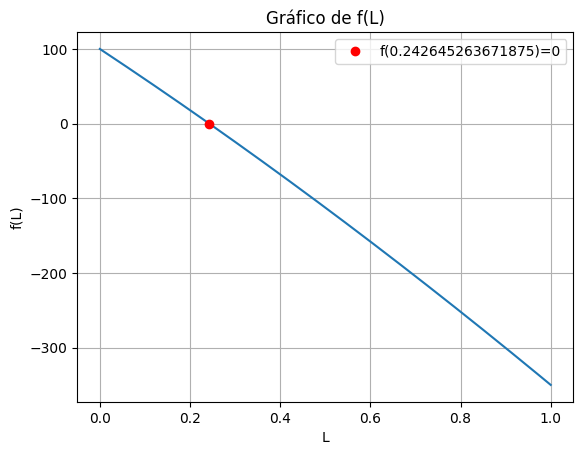

In [ ]:
import math
import matplotlib.pyplot as plt
#K? l_2²+l_2²=l1^2
#K0 l_1=l_2
#K1 l_1 + l_1 * k =
#K1 l_2 - (l_2/2) * k =
#quad_1     l_1*2  
#quad_2 45° l_2/2  k=0  

l1 = 10
l2 = 10

def l1_f(k):
  return l1 + (l1 * k) 

def l2_f(k):
  return l2 - ((l2/2) * k)

def f(k):
    return 2*(l2_f(k)**2) - l1_f(k)**2

x = np.linspace(0, 1, 1000)
y = f(x)

plt.plot(x, y)
plt.grid(True)

z = bissecao(0, 1)

plt.plot(z, f(z), 'ro', label='f('+str(z)+')=0')
plt.legend()


plt.xlabel('L')
plt.ylabel('f(L)')
plt.title('Gráfico de f(L)')
plt.show()



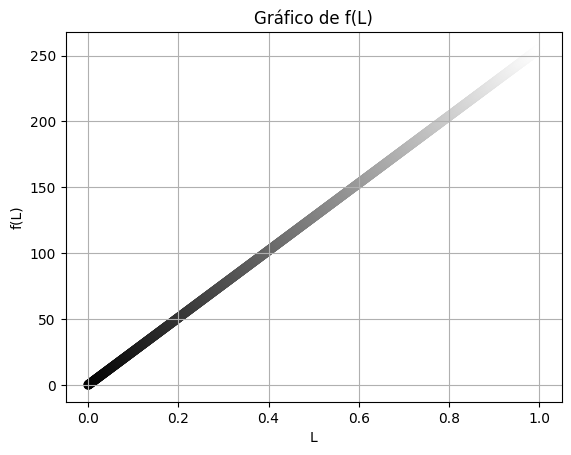

In [ ]:
import math
import matplotlib.pyplot as plt


def f(x):
    return 255*x

x = np.linspace(0, 1, 1000)
y = f(x)

a=[]
for z in x:
  a.append(str(z))

plt.scatter( x, y, color=a)

plt.grid(True)


plt.xlabel('L')
plt.ylabel('f(L)')
plt.title('Gráfico de f(L)')
plt.show()




6. O grau Fahrenheit (oF) é uma escala de temperatura tal que:
• o ponto de fusão da água é de 32 oF (equivalente a 0 oC) e
• o ponto de ebulição da água é de 212 oF (equivalente a 100 oC).
Utilizando o método de Newton ou Lagrange para interpolação linear, calcule a relação entre grau
Fahrenheit e grau Celsius.

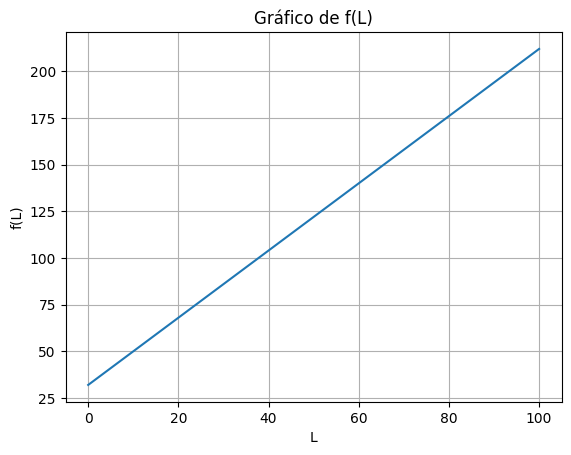

In [ ]:
import math
import matplotlib.pyplot as plt
#F 32F   0C
# 212F 100c
#K1 32 - 212 = 212-32 
#K1 l_2 - (l_2/2) * k =
#quad_1     l_1*2  
#quad_2 45° l_2/2  k=0  

l1 = 10
l2 = 10

def f(c):
  return 32 + ((180*c)/100)

x = np.linspace(0, 100, 1000)
y = f(x)

plt.plot(x, y)
plt.grid(True)
plt.xlabel('L')
plt.ylabel('f(L)')
plt.title('Gráfico de f(L)')
plt.show()



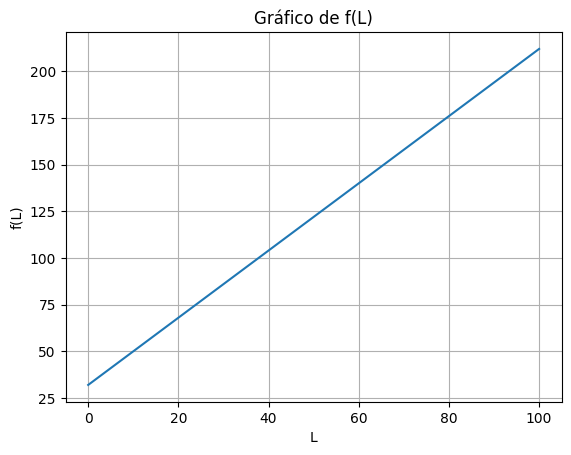

In [ ]:
import math
import matplotlib.pyplot as plt
#F 32F   0C
# 212F 100c
#K1 32 - 212 = 212-32 
#K1 l_2 - (l_2/2) * k =
#quad_1     l_1*2  
#quad_2 45° l_2/2  k=0  

l1 = 10
l2 = 10

def f(c):
  return 32 + ((180*c)/100)

x = np.linspace(0, 100, 1000)
y = f(x)

plt.plot(x, y)
plt.grid(True)
plt.xlabel('L')
plt.ylabel('f(L)')
plt.title('Gráfico de f(L)')
plt.show()



[2. 1.]
[2. 3.]


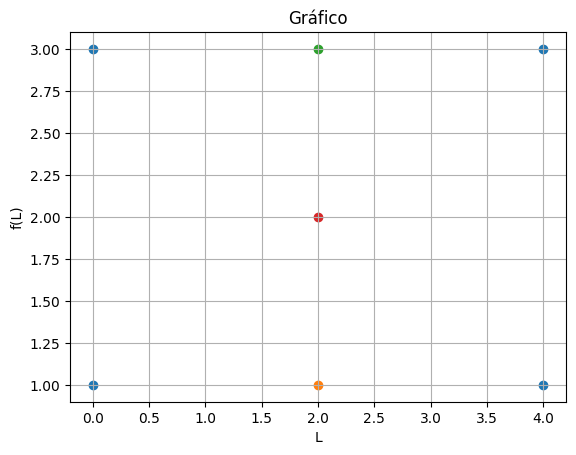

In [ ]:
	
def interpolation(q1, q2):
  return (q1 * 0.5) + (q2 * 0.5)

def interpolation2(p1, p2):
    q12 = np.array(p1)
    q22 = np.array(p2)
    return  interpolation(q12, q22)

def binterpolation(points):
    q12, q22, q11, q21 = points
    r1 = interpolation2(q12, q22)
    r2 = interpolation2(q11, q21)
    print(r1)
    print(r2)
    return interpolation(r1,r2)


points = np.array([[0, 1],
         [4, 1],
         [0, 3],
         [4, 3]])

q12, q22, q11, q21 = points

p = binterpolation(points)
r1 = interpolation2(q12, q22)
r2 = interpolation2(q11, q21)

plt.scatter(points[:,0], points[:,1])
plt.scatter(r1[0], r1[1])
plt.scatter(r2[0], r2[1])
plt.scatter(p[0], p[1])

plt.grid(True)
plt.xlabel('L')
plt.ylabel('f(L)')
plt.title('Gráfico')
plt.show()


In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np

L = 480
C = 640

m = np.zeros((L, C, 3), np.uint8)

v = np.array(((255, 55, 5), (10, 20, 50), (50, 220, 80), (255, 205, 215)))
vl = np.array(((0, 0), (0, 480), (640, 0), (640, 480)))


	
def interpolation(q1, q2, t):
  return (q1 * t) + (q2 * t)

def interpolation2(p1, p2, t):
    q12 = np.array(p1)
    q22 = np.array(p2)
    return  interpolation(q12, q22, t)

def t(p1, p2):
    return (p1[0] - p2[0]) / (p1[0] - p2[0])

def binterpolation(points):
    q12, q22, q11, q21 = points
    t = q12[0]+ q1/2
    r1 = interpolation2(q12, q22)
    r2 = interpolation2(q11, q21)
    print(r1)
    print(r2)
    return interpolation(r1,r2)



p = binterpolation(v)

for i in range(L):
	for j in range(C):
		m[i][j] = (120, 120, 120)

cv2_imshow( m.astype(np.uint8))


NameError: ignored

Um biólogo precisa realizar vários experimentos em uma cobaia, calculando sua resposta a certos
estímulos. Tanto a resposta como os estímulos podem ser convertidos para um número real. De acordo
com teorias, a resposta tem uma relação aproximadamente quadrática em relação ao estímulo fornecido.
Os dados já obtidos foram: (1, 3), (2, 5) e (3, 3). Desenhe o gráfico e calcule o valor esperado para o
estímulo medido como 3.5.

In [ ]:
# Define the data points
x = np.array([1, 2, 3])
y = np.array([3, 5, 3])

print(newton_interpolation(3.5,x, y))

# Create the interpolating function
p = x

# Plot the graph
fig, ax = plt.subplots()

x_plot = np.linspace(0, 5, 1000)
f_plot = newton_interpolation(x_plot,x, y)

plt.plot(x, y, 'ro', label='Pontos')
plt.plot(2.5, newton_interpolation(2.5,x, y), 'go', 
         label='Ponto f(3.5)=' + str(newton_interpolation(2.5,x, y)))

ax.plot(x_plot, f_plot, label='f(x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Biologo experimento')
ax.legend()
plt.show()

Deseja-se obter o efeito da segunda imagem na Figura 4. Para isso a intensidade de cada ponto da
imagem (x, y) é multiplicada por um valor m(x) que está em função da abscissa do ponto.
Quando x = 0, m = 0 (parte escura à esquerda), quando x =
L/2, m = 1 (parte clara no centro) e quando
x = L, m = 0 (parte escura à direita). Utilizando um polinômio interpolador de segundo grau, calcule
a função m(x).

In [ ]:
import math
import matplotlib.pyplot as plt
#0   1
#50  0
#100 1

# Define the data points
x = np.array([0, 50, 100])
y = np.array([0, 1, 0])


x_plot = np.linspace(0, 100, 100)
y_plot = newton_interpolation(x_plot,x, y)


a=[]
for z in y_plot:
  a.append(str(z))

plt.scatter( x_plot, y_plot, color=a)


plt.plot(x, y, 'ro', label='Pontos')

plt.show()

# **Lista 4** 💻

1. ▷ Implemente a função bezier1 e bezier2 em uma das duas opções abaixo:
a. No arquivo bezier_template.c ou bezier_template.r, que escreve na tela vários pontos da curva de
Bézier
b. No arquivo bezier_template.cpp que renderiza a curva na tela. Neste caso precisa ter as bibliotecas
de desenvolvimento do OpenGL, GLU e GLUT. Para compilar use:
g++ bezier_template.cpp -lGL -lGLU -lglut

https://www.onlinegdb.com/online_c++_compiler



```cpp
# include <stdio.h>
# include <stdlib.h>
# include <string.h>
# include <cstring> 

enum {BEZIER_RECURSIVA, BEZIER_NAORECURSIVA};

//implemente uma das duas funções abaixo, mude a variável metodo para alternar o uso de uma ou de outra
//em ambas as funções, o parâmetro v contém ou só as abscissas dos pontos ou só as ordenadas
// por exemplo, se os pontos são (0, 2), (3, 4) e (7, 5)
// bezier será chamada com as abscissas, ou seja, com o vetor 0, 3, 7
// e também será chamada com as ordenadas, ou seja, com o vetor 2, 4, 5

//mude essa variável para usar a função bezier1 (recursiva) ou bezier2 (não recursiva)
int metodo = BEZIER_NAORECURSIVA;

//implementacao recursiva (nao use memoization para comparar os tempos)
//retorna o ponto da curva bezier em t considerando os pontos Pa, ..., Pb
//essa função deve ficar consideravelmente lenta a partir de 8+ pontos
float bezier1(float *v, int a, int b, float t) {
    if(b == a) return v[a];
    float x1 = bezier1(v, a, b-1, t);
    float x2 = bezier1(v, a+1, b, t);
    return x1 * (1-t) + x2 * t;
}


//implementacao nao recursiva
//retorna o ponto da curva bezier em t considerando os pontos P0, ..., Pn-1
//essa implementação deve ser mais eficiente que a recursiva sem memoization
float bezier2(float *v, int n, float t) {
    float temp[n];
    for (int i = 0; i < n; i++) {
        temp[i] = v[i];
    }
    for (int j = 1; j < n; j++) {
        for (int i = 0; i < n - j; i++) {
            temp[i] = (1 - t) * temp[i] + t * temp[i+1];
        }
    }
    return temp[0];
}

void printFloatArray(float *arr, int size) {
    for (int i = 0; i < size; i++) {
        printf("%f ", arr[i]);
    }
    printf("\n");
}

int main() {

    int n = 4; //quantidade de pontos
    float vx[4] = {1, 3, 5, 7}; //abscissas
    float vy[4] = {1, 4, 3, 0}; //ordenadas

    for(float t = 0; t <= 1; t += 0.01) {
        if(metodo == BEZIER_RECURSIVA){
            printf("%f %f\n", bezier1(vx, 0, n-1, t), bezier1(vy, 0, n-1, t));
            printf("%f\n",t);
        }else{
            printf("%f %f\n", bezier2(vx, n, t), bezier2(vy, n, t));
            printf("vx: ");
            printFloatArray(vx, n);
            printf("vy: ");
            printFloatArray(vy, n);
            printf("%f\n",t);}
    }

    return 0;
}
```



2. Considere os pontos de controle (−1, 2), (1, 5), (3, 5) e (5, 2).

a. Calcule a curva de Bézier para t ∈ 0, 0.25, 0.5, 0.75, 1 usando:

  a. Algoritmo de De Casteljau

  b. Polinômios de Bernstein

b. Apresente um plot ou rascunho com a curva.

1 1.0 1.0
3 0.0 1.0
3 0.0 1.0
1 0.0 1.0
1 1.0 0.9700020303019998
3 0.010101010101010102 0.9799000102030406
3 0.0001020304050607081 0.98989898989899
1 1.0306101521283648e-06 1.0
1 1.0 0.9406100593734508
3 0.020202020202020204 0.9600040812162024
3 0.0004081216202428324 0.9797979797979798
1 8.244881217026918e-06 1.0
1 1.0 0.9118179035534408
3 0.030303030303030304 0.9403122130394859
3 0.0009182736455463729 0.9696969696969697
1 2.7826474107465846e-05 1.0
1 1.0 0.8836193791810565
3 0.04040404040404041 0.9208244056728905
3 0.0016324864809713297 0.9595959595959596
1 6.595904973621535e-05 1.0
1 1.0 0.8560083025953855
3 0.05050505050505051 0.9015406591164167
3 0.002550760126517703 0.9494949494949495
1 0.00012882626901604562 1.0
1 1.0 0.8289784901355151
3 0.06060606060606061 0.8824609733700643
3 0.0036730945821854917 0.9393939393939394
1 0.00022261179285972677 1.0
1 1.0 0.8025237581405319
3 0.07070707070707072 0.8635853484338333
3 0.0049994898479746985 0.9292929292929293
1 0.0003534992821800292 1

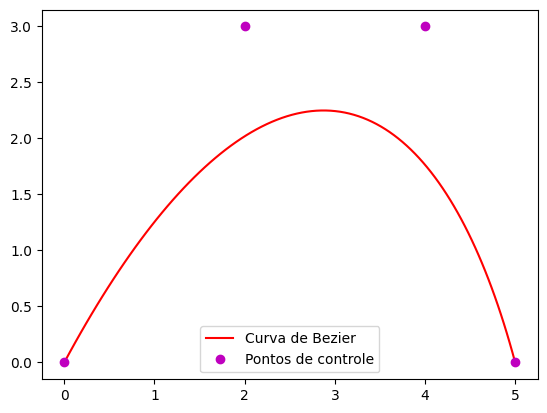

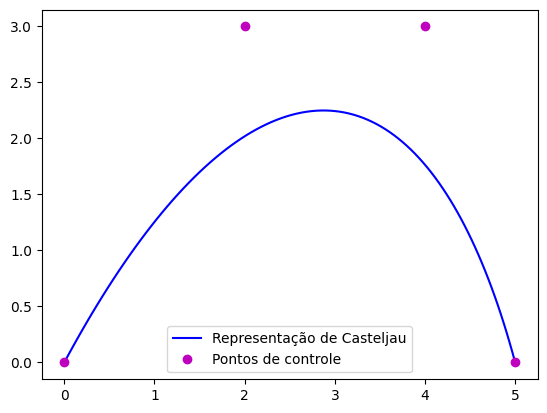

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# pontos de controle
P0 = np.array([0, 0])
P1 = np.array([2, 3])
P2 = np.array([4, 3])
P3 = np.array([5, 0])
points = np.array([P0, P1, P2, P3])

# número de pontos na curva final
num_points = 100


# calcula a curva usando a representação de Casteljau
def casteljau(points, t):
    if len(points) == 1:
        return points[0]
    else:
        return casteljau([points[i] * (1 - t) + points[i+1] * t for i in range(len(points) - 1)], t)
    
curve_points_casteljau = np.array([casteljau(points, t[i]) for i in range(num_points)])

# coeficientes do polinômio de Bernstein
def bernstein_poly(i, n, t):
    print(np.math.comb(n, i) , t**i , (1 - t)**(n - i))
    return np.math.comb(n, i) * t**i * (1 - t)**(n - i)

# avalia o polinômio de Bernstein para cada ponto na curva
t = np.linspace(0, 1, num_points)
curve_points = np.zeros((num_points, 2))
for i in range(num_points):
    curve_points[i] = sum(bernstein_poly(j, 3, t[i]) * points[j] for j in range(4))


# plota a curva de Bezier e os polinômios de Bernstein
plt.plot(curve_points[:,0], curve_points[:,1], 'r-', label='Curva de Bezier')
plt.plot(points[:,0], points[:,1], 'mo', label='Pontos de controle')
plt.legend()
plt.show()

plt.plot(curve_points_casteljau[:,0], curve_points_casteljau[:,1], 'b-', label='Representação de Casteljau')
plt.plot(points[:,0], points[:,1], 'mo', label='Pontos de controle')
plt.legend()
plt.show()



3. 

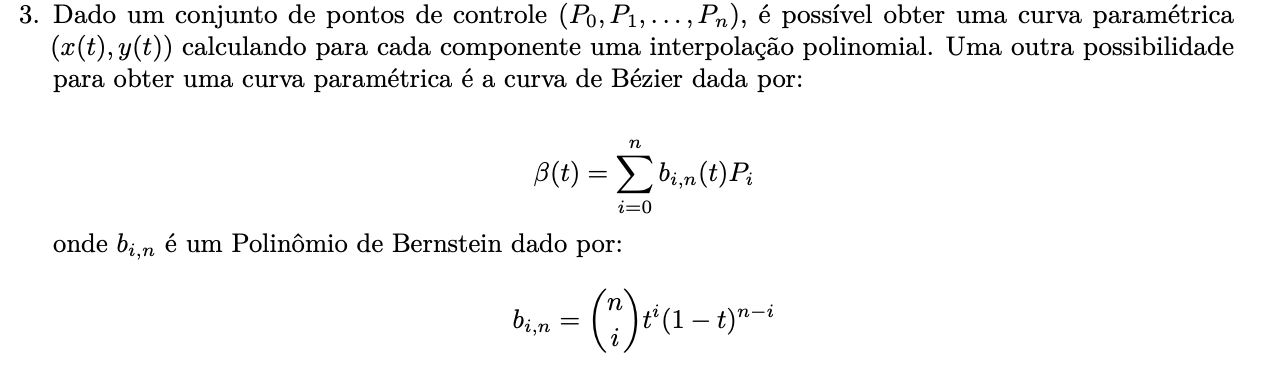



Responda:
a. Qual a vantagem de utilizar a curva de Bézier em relação à curva obtida por interpolação polinomial?

a. Uma vantagem de utilizar a curva de Bézier em relação à curva obtida por interpolação polinomial é que a curva de Bézier tem uma maior flexibilidade de controle sobre a forma da curva, além de ter propriedades matemáticas úteis como a convexidade.


b. Qual o intervalo do parâmetro t para o desenho apropriado da curva?

O intervalo do parâmetro t para o desenho apropriado da curva é 0 ≤ t ≤ 1. Quando t = 0, a curva de Bézier está no ponto de controle inicial (P0) e quando t = 1, a curva está no ponto de controle final (Pn). Valores de t fora desse intervalo podem gerar uma curva fora do domínio da curva de Bézier.


c. A curva β(t) passa necessariamente por dois pontos de controle. Quais e para, respectivamente,
qual valor de t?

A curva β(t) passa necessariamente pelos pontos de controle inicial e final, ou seja, P0 e Pn, respectivamente. Quando t = 0, a curva está em P0 e quando t = 1, a curva está em Pn.

4. Marque V para verdadeiro, F para falso

a. As curvas de Bézier são mais indicadas para o design de curvas que as curvas obtidas por interpolação polinomial.

 Verdadeiro:  As curvas de Bézier são mais adequadas para o design de curvas porque permitem o controle fino sobre a forma da curva e têm propriedades matemáticas úteis, como a convexidade. As curvas obtidas por interpolação polinomial podem levar a curvas indesejadas, como oscilações ou loops.

b. As curvas de Bézier são ótimas para o design de curvas, mas são variantes a transformações
geométricas.

Falso: As curvas de Bézier são afetadas por transformações geométricas, assim como qualquer outra forma geométrica. No entanto, a sua propriedade de "autocontenção" significa que as curvas de Bézier são mais robustas do que outras formas, quando submetidas a transformações como rotação ou escala.

c. A curva de Bézier com 2 pontos de controle corresponde a um segmento de reta.

Verdadeiro: Pois é definida pelos pontos de controle inicial e final.

d. A curva de Bézier com 3 pontos de controle sempre resulta em uma função linear.

Falso: A forma da curva de Bézier com 3 pontos de controle não é necessariamente linear, pois depende da posição relativa dos pontos de controle.

e. Há dois resultados possíveis e distintos pelo algoritmo de De Casteljau: um que é obtido pela
abordagem top-down e outro obtido pela abordagem bottom-up.

Falso: O algoritmo de De Casteljau tem apenas um resultado possível, independentemente da abordagem top-down ou bottom-up.

f. Na abordagem bottom-up do algoritmo de De Casteljau, começa-se pelos casos base, que são os
pontos de controle.

Verdadeiro:
Na abordagem top-down do algoritmo de De Casteljau, a curva de Bézier é dividida em subcurvas e, na abordagem bottom-up, começa-se pelos pontos de controle.

g. A curva de Bézier calculada pelos polinômios de Bernstein envolve o cálculo do binômio de Newton.

Verdadeiro

h. A curva de Bézier é calculada em função de um parâmetro t, tal que, quando t = 0, o ponto
resultante é o primeiro ponto de controle e, quanto t = 1, o ponto resultante é o último ponto de
controle.

Verdadeiro

i. A curva de Bézier é calculada em função de um parâmetro t, tal que, quando t = 0.5, o ponto
resultante é geometricamente o ponto médio entre o primeiro e o último ponto.

Verdadeiro